In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


url = "https://raw.githubusercontent.com/WincAcademy/practice_data/main/data/smoking-indicators.csv"
indicators = pd.read_csv(url, delimiter=";", thousands=",")

# Drop borough id
indicators.drop("la", inplace=True, axis=1)

# Convert to usable arrays
# For chart 1
boroughs = indicators["Borough name"]
smoking_2010_total = indicators["Smoking Status (2010): Total"].to_numpy()

# For chart 2
total = indicators[
    [
        "Borough name",
        "Smoking Status (2010): Total",
        "Smoking Status (2011): Total",
        "Smoking Status (2012): Total",
        "Smoking Status (2013): Total",
    ]
]
# Rename the columns
total.columns = ["boroughs", "2010", "2011", "2012", "2013"]
# Using all the boroughs makes for an illegible chart
total = total[:10]

In [2]:
total

,boroughs,2010,2011,2012,2013
0,Barking and Dagenham,127444,132992,136249,138042
1,Barnet,279881,262740,262863,285053
2,Bexley,178952,176035,179150,181661
3,Brent,198154,195767,201238,197874
4,Bromley,237198,244289,254630,249120
5,Camden,191214,197445,192771,199724
6,Croydon,265598,259530,269860,270639
7,Ealing,246136,246455,255094,242131
8,Enfield,219069,224409,222819,222906
9,Greenwich,172809,175004,176343,175944


In [6]:
import matplotlib.pyplot as plt
import numpy as np


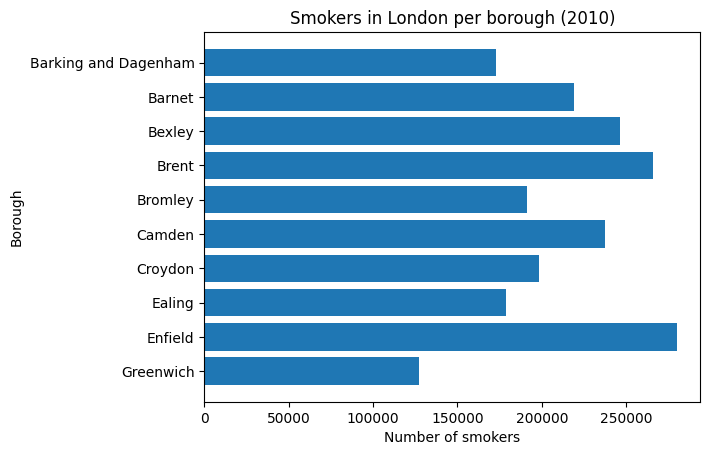

In [17]:
fig, ax = plt.subplots()
boroughs = total.loc[:, "boroughs"]
smoking_2010_total = total.loc[:, "2010"]
ax.barh(boroughs.iloc[::-1], smoking_2010_total)

ax.set_xlabel("Number of smokers")
ax.set_ylabel("Borough")
ax.set_title("Smokers in London per borough (2010)")

plt.show()

<ipython-input-18-7ff3f88c3055>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(years, row[1:], label=row[0])


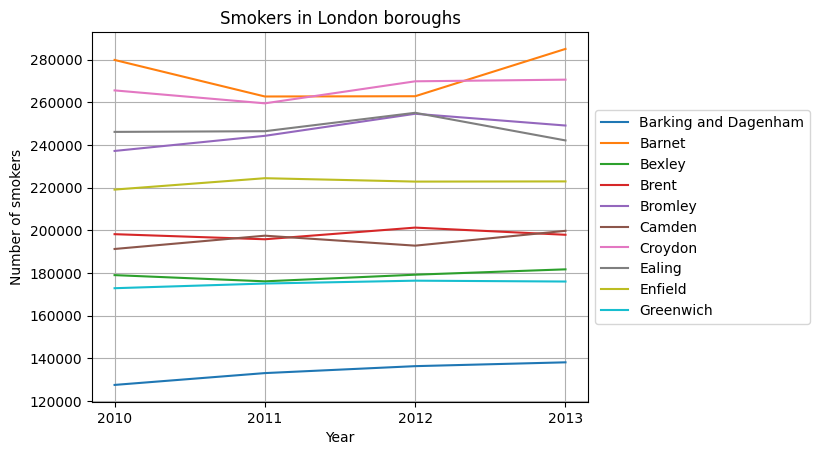

In [18]:
fig, ax = plt.subplots()

years = total.columns[1:]

for index, row in total.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Smokers in London boroughs")
plt.xlabel("Year")
plt.ylabel("Number of smokers")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

